In [13]:


from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import seaborn as sb

%pylab inline



Populating the interactive namespace from numpy and matplotlib


Let us Load the Data sets Kaggle MINST



In [24]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
y = train_data["label"]
x = train_data.drop("label",1)


Let us do some EDA

In [6]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


Plot some of the MINST Numbers 

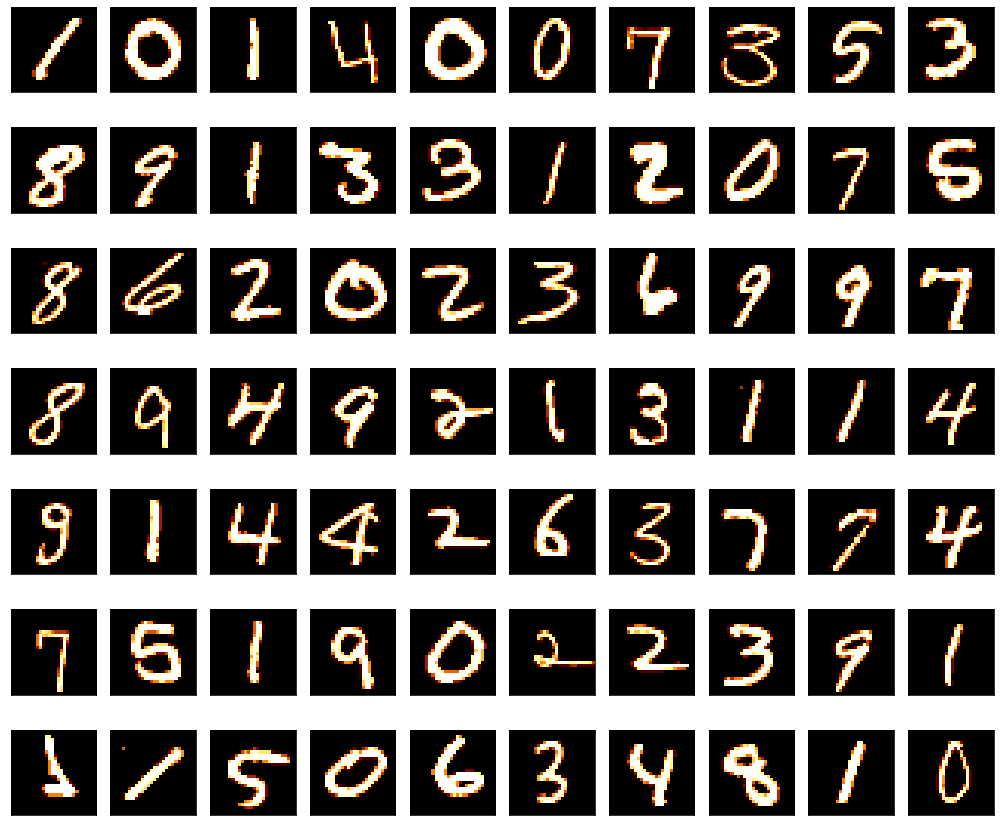

In [9]:
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = x.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

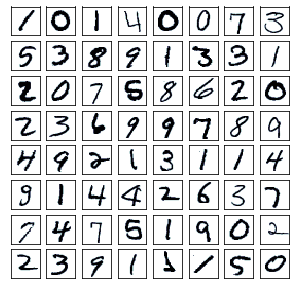

In [14]:

figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = x.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])
    

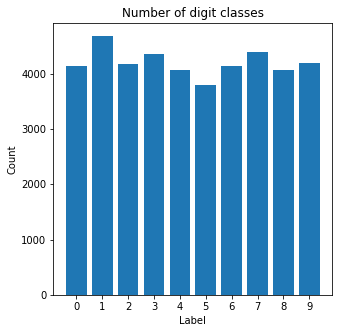

In [15]:
# As part of the EDA, let us see the distribution of the classes

keys, counts = np.unique(y, return_counts=True)

plt.bar(keys, counts)

plt.xticks(range(0, 10))
plt.title("Number of digit classes")
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()


In [26]:


# Scale the input
x = (x - 127.5) / 127.5
test_data = (test_data - 127.5) / 127.5


random_st = 1234

# Split Scaled data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_st)



# Convert the data to tf types
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

x_train = tf.constant(np.array(x_train), dtype = tf.float64)
x_test = tf.constant(np.array(x_test), dtype = tf.float64)


test_data = tf.constant(np.array(test_data), dtype = tf.float32)


In [27]:
type(x_tf)
x_tf.shape, test_data_tf.shape


(TensorShape([42000, 784]), TensorShape([28000, 784]))

In [ ]:
# This Model takes a very long time

#model = keras.models.Sequential([
#    
#    keras.layers.InputLayer(input_shape = [784]), 
#    
#    keras.layers.Dense(576),
#    keras.layers.BatchNormalization(),
#    keras.layers.LeakyReLU(alpha = 0.4),
#    
#    keras.layers.Dense(320),
#    keras.layers.BatchNormalization(),
#    keras.layers.Activation('relu'),
#    
#    keras.layers.Dense(256),
#    keras.layers.BatchNormalization(),
#    keras.layers.Activation('relu'),
#    
#    keras.layers.Dense(160, kernel_regularizer = keras.regularizers.l2(0.0025)),
#    keras.layers.BatchNormalization(),
#    keras.layers.LeakyReLU(alpha = 0.4),
#    
#    keras.layers.Dense(84, kernel_regularizer = keras.regularizers.l2(0.0025)),
#    keras.layers.BatchNormalization(),
#    keras.layers.LeakyReLU(alpha = 0.25),
#    
#    keras.layers.Dense(10, activation = keras.activations.softmax),
#])


In [105]:
# NN Models 2x2, hidden-layers:{ 2, 4 } neurons:{ 100, 200 }

# 2 x 100 Model

import datetime as dt

model = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape = [784]), 
    
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(100, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(10, activation = keras.activations.softmax),
])



# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
            loss = keras.losses.sparse_categorical_crossentropy, 
            metrics = ['accuracy'])


# Model wih SGD Optimizer 
#model.compile(tf.keras.optimizers.SGD(learning_rate=0.1), 
#            loss = keras.losses.sparse_categorical_crossentropy, 
#            metrics = ['accuracy'])


# summarize the model
model.summary()


# Initialize callbacks
cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_acc')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_acc')

# Plot the model
#keras.utils.plot_model(model)



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_24 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_25 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 100)             

In [106]:

start_time = dt.datetime.now()

## Fit the Model 
# Fit the data to the model and pass the validation data
history = model.fit(x_train, y_train, validation_split=0.2, epochs = 200, batch_size = 140, callbacks = [cb1, cb2], verbose = 1)

end_time = dt.datetime.now()
time_taken = end_time-start_time
print( "Time Taken: %s" %time_taken )



Epoch 1/200
192/192 [==============================] - 1s 3ms/step - loss: 0.7984 - accuracy: 0.8484 - val_loss: 11.3617 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 2/200
192/192 [==============================] - 1s 3ms/step - loss: 0.4256 - accuracy: 0.9365 - val_loss: 49.2517 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 3/200
192/192 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.9504 - val_loss: 120.2650 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 4/200
192/192 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.9624 - val_loss: 74.8411 - val_accuracy: 0.0936 - lr: 5.0000e-04
Epoch 5/200
192/192 [==============================] - 1s 3ms/step - loss: 0.2024 - accuracy: 0.9687 - val_loss: 83.1851 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 6/200
192/192 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9745 - val_loss: 187.1935 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 7/200
192/192 [===========

192/192 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9932 - val_loss: 211.3253 - val_accuracy: 0.1234 - lr: 5.0000e-04
Epoch 16/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9939 - val_loss: 444.2395 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 17/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9946 - val_loss: 265.8104 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 18/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9954 - val_loss: 393.7179 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 19/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9960 - val_loss: 208.3878 - val_accuracy: 0.2205 - lr: 5.0000e-04
Epoch 20/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9953 - val_loss: 284.0084 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 21/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9961 - val_loss: 227.9812 - val_accuracy: 0.1565 - lr: 5.0000e-04
Epoch 31/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0259 - accuracy: 0.9963 - val_loss: 378.6846 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 32/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9966 - val_loss: 301.0269 - val_accuracy: 0.1810 - lr: 5.0000e-04
Epoch 33/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0221 - accuracy: 0.9977 - val_loss: 125.5944 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 34/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0199 - accuracy: 0.9983 - val_loss: 276.8532 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 35/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9971 - val_loss: 684.1900 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 36/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0195 - accuracy: 0.9974 - val_loss: 327.5341 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 46/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9955 - val_loss: 337.5670 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 47/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9968 - val_loss: 506.9929 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 48/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9983 - val_loss: 255.0814 - val_accuracy: 0.0996 - lr: 5.0000e-04
Epoch 49/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9994 - val_loss: 456.4641 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 50/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.9996 - val_loss: 103.0257 - val_accuracy: 0.1668 - lr: 5.0000e-04
Epoch 51/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9918 - val_loss: 448.0324 - val_accuracy: 0.1911 - lr: 5.0000e-04
Epoch 60/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9963 - val_loss: 249.9637 - val_accuracy: 0.1001 - lr: 5.0000e-04
Epoch 61/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.9988 - val_loss: 188.3055 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 62/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9995 - val_loss: 282.0287 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 63/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9998 - val_loss: 513.9680 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 64/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0098 - accuracy: 0.9998 - val_loss: 518.2521 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 65/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.9983 - val_loss: 338.5854 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 75/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0114 - accuracy: 0.9997 - val_loss: 119.0034 - val_accuracy: 0.1055 - lr: 5.0000e-04
Epoch 76/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0093 - accuracy: 0.9999 - val_loss: 270.1316 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 77/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 629.1259 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 78/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9946 - val_loss: 916.6324 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 79/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9954 - val_loss: 674.0716 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 80/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9988 - val_loss: 314.4827 - val_accuracy: 0.0936 - lr: 5.0000e-04
Epoch 90/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9975 - val_loss: 650.4770 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 91/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9967 - val_loss: 296.2481 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 92/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9977 - val_loss: 239.2235 - val_accuracy: 0.0997 - lr: 5.0000e-04
Epoch 93/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9992 - val_loss: 183.5158 - val_accuracy: 0.1454 - lr: 5.0000e-04
Epoch 94/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9990 - val_loss: 142.6673 - val_accuracy: 0.1057 - lr: 5.0000e-04
Epoch 95/200
192/192 [=============

192/192 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 83.5055 - val_accuracy: 0.2048 - lr: 5.0000e-04
Epoch 104/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 0.9997 - val_loss: 277.3039 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 105/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9921 - val_loss: 1284.4662 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 106/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9959 - val_loss: 366.1827 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 107/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9990 - val_loss: 292.5445 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 108/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9994 - val_loss: 298.1534 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 109/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0114 - accuracy: 0.9991 - val_loss: 406.7973 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 119/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9979 - val_loss: 332.7818 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 120/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9971 - val_loss: 204.4802 - val_accuracy: 0.1307 - lr: 5.0000e-04
Epoch 121/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.9976 - val_loss: 533.8484 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 122/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.9976 - val_loss: 527.8176 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 123/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9988 - val_loss: 398.0518 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 124/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9997 - val_loss: 175.5700 - val_accuracy: 0.1189 - lr: 5.0000e-04
Epoch 134/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9917 - val_loss: 793.0931 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 135/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9971 - val_loss: 364.1137 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 136/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9993 - val_loss: 282.0636 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 137/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9999 - val_loss: 235.5452 - val_accuracy: 0.1116 - lr: 5.0000e-04
Epoch 138/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0094 - accuracy: 0.9999 - val_loss: 225.5188 - val_accuracy: 0.1054 - lr: 5.0000e-04
Epoch 139/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.9988 - val_loss: 376.9445 - val_accuracy: 0.1048 - lr: 5.0000e-04
Epoch 148/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9949 - val_loss: 442.6179 - val_accuracy: 0.0938 - lr: 5.0000e-04
Epoch 149/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9973 - val_loss: 402.4284 - val_accuracy: 0.0899 - lr: 5.0000e-04
Epoch 150/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9994 - val_loss: 274.7547 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 151/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.9997 - val_loss: 137.8337 - val_accuracy: 0.0996 - lr: 5.0000e-04
Epoch 152/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.9996 - val_loss: 462.5579 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 153/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0151 - accuracy: 0.9986 - val_loss: 383.7516 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 163/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9995 - val_loss: 214.5255 - val_accuracy: 0.1424 - lr: 5.0000e-04
Epoch 164/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.9990 - val_loss: 585.7115 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 165/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0123 - accuracy: 0.9988 - val_loss: 322.0967 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 166/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.9991 - val_loss: 313.8402 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 167/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 547.0820 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 168/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.9988 - val_loss: 336.7200 - val_accuracy: 0.1295 - lr: 5.0000e-04
Epoch 178/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 385.1312 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 179/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 434.8434 - val_accuracy: 0.1001 - lr: 5.0000e-04
Epoch 180/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9986 - val_loss: 293.6736 - val_accuracy: 0.1003 - lr: 5.0000e-04
Epoch 181/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9985 - val_loss: 573.9603 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 182/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9985 - val_loss: 505.4061 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 183/200
192/192 [=======

192/192 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9995 - val_loss: 436.2403 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 192/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9992 - val_loss: 201.7792 - val_accuracy: 0.1841 - lr: 5.0000e-04
Epoch 193/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9993 - val_loss: 400.5190 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 194/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9981 - val_loss: 244.3365 - val_accuracy: 0.1885 - lr: 5.0000e-04
Epoch 195/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 690.7880 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 196/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9985 - val_loss: 364.8181 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 197/200
192/192 [=======

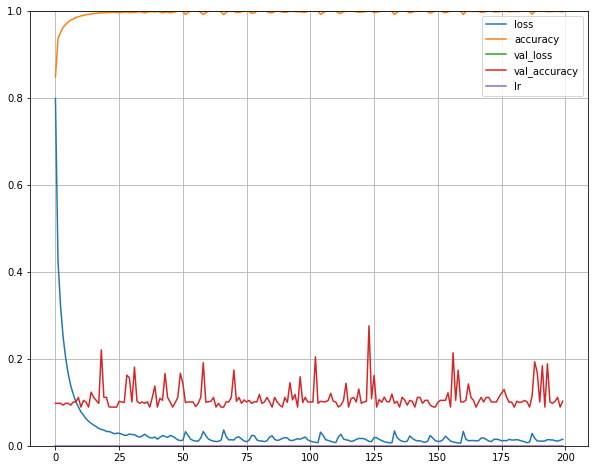

In [107]:
# Plot the train-val Loss and Accuracy

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [108]:
# Evaluate the model with Test data set
eval = model.evaluate(x_test, y_test)

train_accuracy = round(history.history['accuracy'][-1], 5)
test_accuracy = round(eval[1], 5)
time = round(time_taken.total_seconds())

eval

263/263 [==============================] - 1s 2ms/step - loss: 544.1578 - accuracy: 0.1067


[544.1577758789062, 0.1066666692495346]

In [116]:
printDf = pd.DataFrame(columns = ['Layers', 'Nodes', 'Time', 'Training Accuracy', 'Test Accuracy'])
printDf = printDf.append( pd.Series([2, 100, time, train_accuracy, test_accuracy], index=printDf.columns), ignore_index=True )
printDf

,Layers,Nodes,Time,Training Accuracy,Test Accuracy
0,2.0,100.0,113.0,0.99792,0.10667


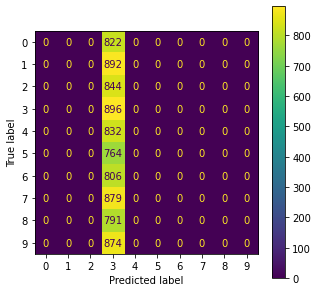

In [110]:
# Let us look at the Multi-Class Confusion Matrix 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, confusion_matrix


y_test_pred = np.argmax(model.predict(x_test), axis=-1)

cm_mat = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_mat).plot()
#print('confusion matrix:\n', cm_mat)


In [111]:
# Kaggle Submission
test_data
pred = np.argmax(model.predict(test_data), axis=-1)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('sample_submission_NN_2_100.csv', index=False)
print("Submission successful")


   ImageId  Label
0        1      3
1        2      3
2        3      3
3        4      3
4        5      3
Submission successful


In [112]:
# NN with 2 layers 200 neurons each
model = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape = [784]), 
    
    keras.layers.Dense(200),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(200, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(10, activation = keras.activations.softmax),
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
            loss = keras.losses.sparse_categorical_crossentropy, 
            metrics = ['accuracy'])

# summarize the model
model.summary()

# Initialize callbacks
cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_acc')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_acc')

# Fit the data to the model and pass the validation data
start_time = dt.datetime.now()
history = model.fit(x_train, y_train, validation_split=0.2, epochs = 200, batch_size = 140, callbacks = [cb1, cb2], verbose = 1)
end_time = dt.datetime.now()
time_taken = end_time-start_time
print( "Time Taken: %s" %time_taken )


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 200)               157000    
                                                                 
 batch_normalization_26 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 200)               0         
                                                                 
 dense_40 (Dense)            (None, 200)               40200     
                                                                 
 batch_normalization_27 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 200)             

192/192 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9935 - val_loss: 184.3887 - val_accuracy: 0.1943 - lr: 5.0000e-04
Epoch 14/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0484 - accuracy: 0.9934 - val_loss: 472.7232 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 15/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0464 - accuracy: 0.9932 - val_loss: 358.6538 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 16/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9931 - val_loss: 278.0393 - val_accuracy: 0.0996 - lr: 5.0000e-04
Epoch 17/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0431 - accuracy: 0.9944 - val_loss: 433.5968 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 18/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0414 - accuracy: 0.9945 - val_loss: 298.4718 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 19/200
192/192 [=============

192/192 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9976 - val_loss: 276.9695 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 28/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0246 - accuracy: 0.9981 - val_loss: 250.5898 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 29/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0275 - accuracy: 0.9965 - val_loss: 333.0578 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 30/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0401 - accuracy: 0.9926 - val_loss: 485.0028 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 31/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9970 - val_loss: 130.4093 - val_accuracy: 0.1330 - lr: 5.0000e-04
Epoch 32/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9980 - val_loss: 461.7616 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 33/200
192/192 [=============

192/192 [==============================] - 1s 4ms/step - loss: 0.0285 - accuracy: 0.9963 - val_loss: 395.8106 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 43/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0285 - accuracy: 0.9965 - val_loss: 198.6377 - val_accuracy: 0.1077 - lr: 5.0000e-04
Epoch 44/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0247 - accuracy: 0.9978 - val_loss: 217.5797 - val_accuracy: 0.1899 - lr: 5.0000e-04
Epoch 45/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9964 - val_loss: 332.6860 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 46/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9959 - val_loss: 335.4372 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 47/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.9978 - val_loss: 149.4859 - val_accuracy: 0.1723 - lr: 5.0000e-04
Epoch 48/200
192/192 [=============

192/192 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9986 - val_loss: 227.9178 - val_accuracy: 0.0891 - lr: 5.0000e-04
Epoch 58/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.9983 - val_loss: 269.1525 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 59/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0221 - accuracy: 0.9978 - val_loss: 449.8377 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 60/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0329 - accuracy: 0.9937 - val_loss: 704.8499 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 61/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0270 - accuracy: 0.9969 - val_loss: 535.7899 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 62/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0247 - accuracy: 0.9977 - val_loss: 381.9911 - val_accuracy: 0.1064 - lr: 5.0000e-04
Epoch 63/200
192/192 [=============

192/192 [==============================] - 1s 4ms/step - loss: 0.0215 - accuracy: 0.9985 - val_loss: 154.2760 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 72/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.9993 - val_loss: 137.1458 - val_accuracy: 0.1890 - lr: 5.0000e-04
Epoch 73/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0182 - accuracy: 0.9983 - val_loss: 492.1447 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 74/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0290 - accuracy: 0.9950 - val_loss: 539.6698 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 75/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9958 - val_loss: 190.8141 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 76/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9989 - val_loss: 342.1507 - val_accuracy: 0.0976 - lr: 5.0000e-04
Epoch 77/200
192/192 [=============

192/192 [==============================] - 1s 4ms/step - loss: 0.0179 - accuracy: 0.9990 - val_loss: 196.4908 - val_accuracy: 0.1205 - lr: 5.0000e-04
Epoch 87/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.9959 - val_loss: 1126.6646 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 88/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9958 - val_loss: 954.3696 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 89/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.9987 - val_loss: 253.2864 - val_accuracy: 0.1116 - lr: 5.0000e-04
Epoch 90/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9997 - val_loss: 311.1130 - val_accuracy: 0.1001 - lr: 5.0000e-04
Epoch 91/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0171 - accuracy: 0.9983 - val_loss: 789.4025 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 92/200
192/192 [============

192/192 [==============================] - 1s 4ms/step - loss: 0.0237 - accuracy: 0.9968 - val_loss: 718.5921 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 102/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0232 - accuracy: 0.9974 - val_loss: 246.3764 - val_accuracy: 0.1001 - lr: 5.0000e-04
Epoch 103/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0188 - accuracy: 0.9985 - val_loss: 303.7628 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 104/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9980 - val_loss: 266.5161 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 105/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9972 - val_loss: 238.5222 - val_accuracy: 0.1283 - lr: 5.0000e-04
Epoch 106/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9972 - val_loss: 597.6262 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 107/200
192/192 [=======

192/192 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9971 - val_loss: 404.9096 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 116/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9985 - val_loss: 466.8374 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 117/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0145 - accuracy: 0.9996 - val_loss: 400.4472 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 118/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0203 - accuracy: 0.9973 - val_loss: 795.8434 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 119/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0229 - accuracy: 0.9973 - val_loss: 507.3372 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 120/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9987 - val_loss: 226.1854 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 121/200
192/192 [=======

192/192 [==============================] - 1s 4ms/step - loss: 0.0221 - accuracy: 0.9976 - val_loss: 603.0975 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 131/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9984 - val_loss: 522.3579 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 132/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0177 - accuracy: 0.9984 - val_loss: 477.9720 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 133/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.9969 - val_loss: 590.3541 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 134/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9983 - val_loss: 223.8121 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 135/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9965 - val_loss: 696.7312 - val_accuracy: 0.0996 - lr: 5.0000e-04
Epoch 136/200
192/192 [=======

192/192 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.9999 - val_loss: 176.5882 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 146/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0154 - accuracy: 0.9980 - val_loss: 1247.8971 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 147/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9946 - val_loss: 443.5992 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 148/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0203 - accuracy: 0.9985 - val_loss: 248.1600 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 149/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0152 - accuracy: 0.9996 - val_loss: 340.2910 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 150/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0126 - accuracy: 0.9997 - val_loss: 197.6625 - val_accuracy: 0.1089 - lr: 5.0000e-04
Epoch 151/200
192/192 [======

192/192 [==============================] - 1s 4ms/step - loss: 0.0172 - accuracy: 0.9991 - val_loss: 380.7481 - val_accuracy: 0.1631 - lr: 5.0000e-04
Epoch 160/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9995 - val_loss: 161.0606 - val_accuracy: 0.2015 - lr: 5.0000e-04
Epoch 161/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0126 - accuracy: 0.9991 - val_loss: 459.8353 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 162/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9976 - val_loss: 397.5746 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 163/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9948 - val_loss: 654.7488 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 164/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9980 - val_loss: 412.8369 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 165/200
192/192 [=======

192/192 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.9955 - val_loss: 317.3788 - val_accuracy: 0.1829 - lr: 5.0000e-04
Epoch 175/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9961 - val_loss: 255.5694 - val_accuracy: 0.1010 - lr: 5.0000e-04
Epoch 176/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9989 - val_loss: 191.5117 - val_accuracy: 0.1295 - lr: 5.0000e-04
Epoch 177/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0165 - accuracy: 0.9991 - val_loss: 477.4536 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 178/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0137 - accuracy: 0.9995 - val_loss: 345.4784 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 179/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9984 - val_loss: 566.0948 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 180/200
192/192 [=======

192/192 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.9989 - val_loss: 358.8437 - val_accuracy: 0.1478 - lr: 5.0000e-04
Epoch 190/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.9958 - val_loss: 392.9247 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 191/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0186 - accuracy: 0.9988 - val_loss: 125.1201 - val_accuracy: 0.1054 - lr: 5.0000e-04
Epoch 192/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.9995 - val_loss: 194.6163 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 193/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0111 - accuracy: 0.9999 - val_loss: 95.8513 - val_accuracy: 0.2161 - lr: 5.0000e-04
Epoch 194/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 159.7585 - val_accuracy: 0.1001 - lr: 5.0000e-04
Epoch 195/200
192/192 [========

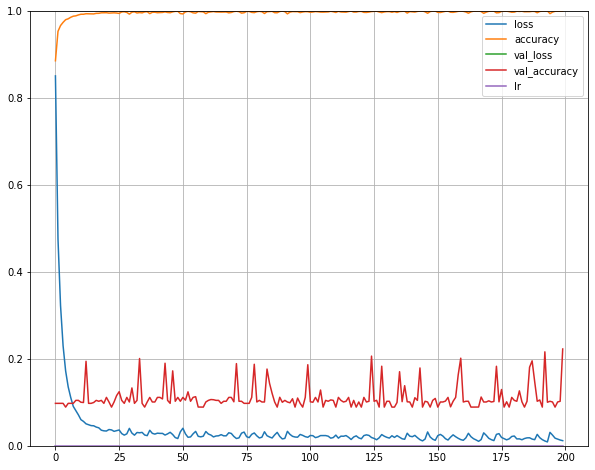

In [113]:
# Plot the train-val Loss and Accuracy

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [117]:
# Evaluate the model with Test Data 

eval = model.evaluate(x_test, y_test)

train_accuracy = round(history.history['accuracy'][-1], 5)
test_accuracy = round(eval[1], 5)
time = round(time_taken.total_seconds())

printDf = printDf.append( pd.Series([2, 200, time, train_accuracy, test_accuracy], index=printDf.columns), 
                ignore_index=True )
eval

263/263 [==============================] - 0s 2ms/step - loss: 81.9280 - accuracy: 0.2192


[81.92803192138672, 0.21916666626930237]

In [118]:
printDf

,Layers,Nodes,Time,Training Accuracy,Test Accuracy
0,2.0,100.0,113.0,0.99792,0.10667
1,2.0,200.0,155.0,0.99955,0.21917


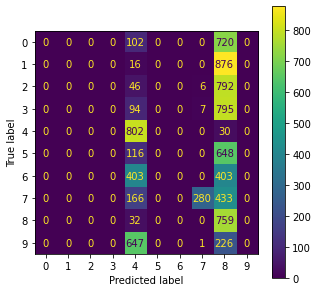

In [119]:
# Multi-Class Confusion matrix plot

y_test_pred = np.argmax(model.predict(x_test), axis=-1)
cm_mat = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_mat).plot()


In [120]:
# Kaggle Submission
test_data
pred = np.argmax(model.predict(test_data), axis=-1)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('sample_submission_NN_2_200.csv', index=False)
print("Submission successful")


   ImageId  Label
0        1      8
1        2      8
2        3      4
3        4      4
4        5      8
Submission successful


In [121]:
# NN with 4 layers 100 neurons each
model = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape = [784]), 
    
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(100, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(100, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(10, activation = keras.activations.softmax),
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
            loss = keras.losses.sparse_categorical_crossentropy, 
            metrics = ['accuracy'])

# summarize the model
model.summary()

# Initialize callbacks
cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_acc')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_acc')

# Fit the data to the model and pass the validation data
start_time = dt.datetime.now()
history = model.fit(x_train, y_train, validation_split=0.2, epochs = 200, batch_size = 140, callbacks = [cb1, cb2], verbose = 1)
end_time = dt.datetime.now()
time_taken = end_time-start_time
print( "Time Taken: %s" %time_taken )


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_28 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_29 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 100)             

192/192 [==============================] - 1s 5ms/step - loss: 0.0800 - accuracy: 0.9922 - val_loss: 400.1888 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 12/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9933 - val_loss: 209.7067 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 13/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0585 - accuracy: 0.9952 - val_loss: 238.2642 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 14/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0624 - accuracy: 0.9921 - val_loss: 359.0800 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 15/200
192/192 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9937 - val_loss: 515.6253 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 16/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.9929 - val_loss: 176.3298 - val_accuracy: 0.1051 - lr: 5.0000e-04
Epoch 17/200
192/192 [=============

192/192 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9958 - val_loss: 172.2631 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 27/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0308 - accuracy: 0.9956 - val_loss: 345.4587 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 28/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0289 - accuracy: 0.9964 - val_loss: 861.9741 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 29/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0293 - accuracy: 0.9961 - val_loss: 306.4340 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 30/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0295 - accuracy: 0.9958 - val_loss: 387.2140 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 31/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0294 - accuracy: 0.9960 - val_loss: 168.2184 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 32/200
192/192 [=============

192/192 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9952 - val_loss: 478.8079 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 41/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0266 - accuracy: 0.9963 - val_loss: 379.4232 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 42/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0250 - accuracy: 0.9970 - val_loss: 266.5770 - val_accuracy: 0.2232 - lr: 5.0000e-04
Epoch 43/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0264 - accuracy: 0.9961 - val_loss: 274.5141 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 44/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0259 - accuracy: 0.9962 - val_loss: 146.0681 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 45/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0248 - accuracy: 0.9964 - val_loss: 274.5050 - val_accuracy: 0.0891 - lr: 5.0000e-04
Epoch 46/200
192/192 [=============

192/192 [==============================] - 1s 5ms/step - loss: 0.0159 - accuracy: 0.9990 - val_loss: 287.1848 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 56/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0163 - accuracy: 0.9983 - val_loss: 379.5739 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 57/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0303 - accuracy: 0.9937 - val_loss: 531.1918 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 58/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0234 - accuracy: 0.9965 - val_loss: 129.4598 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 59/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0202 - accuracy: 0.9978 - val_loss: 415.2339 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 60/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0222 - accuracy: 0.9967 - val_loss: 311.1746 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 61/200
192/192 [=============

192/192 [==============================] - 1s 5ms/step - loss: 0.0187 - accuracy: 0.9978 - val_loss: 1043.6278 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 71/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0185 - accuracy: 0.9979 - val_loss: 513.7881 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 72/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0231 - accuracy: 0.9961 - val_loss: 826.0256 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 73/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0221 - accuracy: 0.9968 - val_loss: 488.9544 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 74/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0211 - accuracy: 0.9968 - val_loss: 193.1382 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 75/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0190 - accuracy: 0.9976 - val_loss: 798.2895 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 76/200
192/192 [============

192/192 [==============================] - 1s 6ms/step - loss: 0.0186 - accuracy: 0.9972 - val_loss: 358.2407 - val_accuracy: 0.1530 - lr: 5.0000e-04
Epoch 85/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0172 - accuracy: 0.9979 - val_loss: 304.2888 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 86/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0203 - accuracy: 0.9969 - val_loss: 338.4242 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 87/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 442.5319 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 88/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0162 - accuracy: 0.9978 - val_loss: 402.8062 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 89/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0204 - accuracy: 0.9964 - val_loss: 564.3541 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 90/200
192/192 [=============

192/192 [==============================] - 1s 5ms/step - loss: 0.0140 - accuracy: 0.9984 - val_loss: 441.4571 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 100/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0181 - accuracy: 0.9973 - val_loss: 527.8969 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 101/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9976 - val_loss: 416.2339 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 102/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0183 - accuracy: 0.9973 - val_loss: 802.2592 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 103/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0135 - accuracy: 0.9990 - val_loss: 327.8769 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 104/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0157 - accuracy: 0.9980 - val_loss: 628.6790 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 105/200
192/192 [=======

192/192 [==============================] - 1s 7ms/step - loss: 0.0195 - accuracy: 0.9968 - val_loss: 275.3168 - val_accuracy: 0.1254 - lr: 5.0000e-04
Epoch 115/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0113 - accuracy: 0.9994 - val_loss: 212.5430 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 116/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 305.0990 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 117/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0130 - accuracy: 0.9985 - val_loss: 492.3665 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 118/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0178 - accuracy: 0.9972 - val_loss: 407.2026 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 119/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 559.0420 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 120/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0113 - accuracy: 0.9991 - val_loss: 181.8998 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 129/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 341.2036 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 130/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 402.0307 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 131/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0186 - accuracy: 0.9964 - val_loss: 402.1132 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 132/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0178 - accuracy: 0.9969 - val_loss: 684.0692 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 133/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0131 - accuracy: 0.9986 - val_loss: 411.2003 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 134/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0109 - accuracy: 0.9988 - val_loss: 329.1996 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 144/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 461.0234 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 145/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 1054.0115 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 146/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0158 - accuracy: 0.9972 - val_loss: 934.3182 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 147/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0107 - accuracy: 0.9991 - val_loss: 538.6195 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 148/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0105 - accuracy: 0.9989 - val_loss: 540.7437 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 149/200
192/192 [======

192/192 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 293.1203 - val_accuracy: 0.1086 - lr: 5.0000e-04
Epoch 159/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0118 - accuracy: 0.9985 - val_loss: 380.4172 - val_accuracy: 0.0896 - lr: 5.0000e-04
Epoch 160/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0126 - accuracy: 0.9982 - val_loss: 409.1034 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 161/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0102 - accuracy: 0.9990 - val_loss: 213.2957 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 162/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0139 - accuracy: 0.9980 - val_loss: 471.2718 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 163/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0136 - accuracy: 0.9981 - val_loss: 329.5999 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 164/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 535.9138 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 173/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 470.3842 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 174/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0146 - accuracy: 0.9976 - val_loss: 647.1407 - val_accuracy: 0.1402 - lr: 5.0000e-04
Epoch 175/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0135 - accuracy: 0.9980 - val_loss: 467.2520 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 176/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 283.4594 - val_accuracy: 0.1274 - lr: 5.0000e-04
Epoch 177/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0105 - accuracy: 0.9987 - val_loss: 347.7424 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 178/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0104 - accuracy: 0.9985 - val_loss: 539.4186 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 188/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 397.0881 - val_accuracy: 0.1238 - lr: 5.0000e-04
Epoch 189/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0088 - accuracy: 0.9991 - val_loss: 503.6193 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 190/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0085 - accuracy: 0.9992 - val_loss: 237.0697 - val_accuracy: 0.1070 - lr: 5.0000e-04
Epoch 191/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9981 - val_loss: 339.0438 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 192/200
192/192 [==============================] - 1s 5ms/step - loss: 0.0136 - accuracy: 0.9976 - val_loss: 364.8149 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 193/200
192/192 [=======

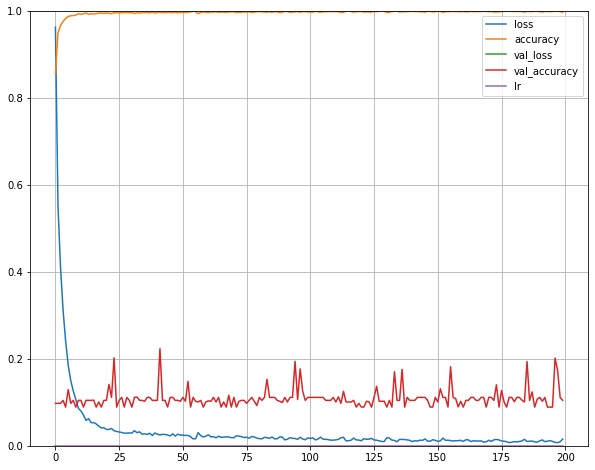

In [122]:
# Plot the train-val Loss and Accuracy
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [123]:
# Evaluate the Model with Test data set we have allocated 
eval = model.evaluate(x_test, y_test)

train_accuracy = round(history.history['accuracy'][-1], 5)
test_accuracy = round(eval[1], 5)
time = round(time_taken.total_seconds())

printDf = printDf.append( pd.Series([4, 100, time, train_accuracy, test_accuracy], index=printDf.columns), 
                ignore_index=True )
eval

263/263 [==============================] - 1s 2ms/step - loss: 483.4652 - accuracy: 0.1046


[483.4652404785156, 0.10464286059141159]

In [124]:
printDf

,Layers,Nodes,Time,Training Accuracy,Test Accuracy
0,2.0,100.0,113.0,0.99792,0.10667
1,2.0,200.0,155.0,0.99955,0.21917
2,4.0,100.0,213.0,0.99691,0.10464


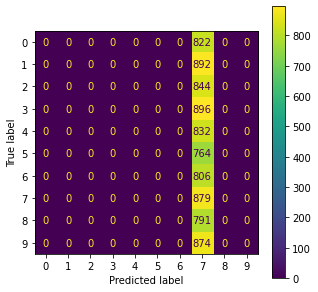

In [125]:
# The Multi-Class Confusion Matrix
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
cm_mat = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_mat).plot()


In [126]:
# Kaggle Submission
test_data
pred = np.argmax(model.predict(test_data), axis=-1)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('sample_submission_NN_4_100.csv', index=False)
print("Submission successful")

   ImageId  Label
0        1      7
1        2      7
2        3      7
3        4      7
4        5      7
Submission successful


In [127]:
# NN with 4 layers 200 neurons each
model = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape = [784]), 
    
    keras.layers.Dense(200),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(200),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(200, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Dense(200, kernel_regularizer = keras.regularizers.l2(0.0025)),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.4),
    
    keras.layers.Dense(10, activation = keras.activations.softmax),
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
            loss = keras.losses.sparse_categorical_crossentropy, 
            metrics = ['accuracy'])

# summarize the model
model.summary()

# Initialize callbacks
cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_acc')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_acc')

# Fit the data to the model and pass the validation data
start_time = dt.datetime.now()
history = model.fit(x_train, y_train, validation_split=0.2, epochs = 200, batch_size = 140, callbacks = [cb1, cb2], verbose = 1)
end_time = dt.datetime.now()
time_taken = end_time-start_time
print( "Time Taken: %s" %time_taken )


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 200)               157000    
                                                                 
 batch_normalization_32 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 200)               0         
                                                                 
 dense_48 (Dense)            (None, 200)               40200     
                                                                 
 batch_normalization_33 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 200)             

192/192 [==============================] - 1s 6ms/step - loss: 0.0850 - accuracy: 0.9901 - val_loss: 101.8289 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 12/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0708 - accuracy: 0.9921 - val_loss: 383.0715 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 13/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0677 - accuracy: 0.9923 - val_loss: 365.3964 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 14/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0612 - accuracy: 0.9931 - val_loss: 247.7458 - val_accuracy: 0.0964 - lr: 5.0000e-04
Epoch 15/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0586 - accuracy: 0.9922 - val_loss: 416.4722 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 16/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0556 - accuracy: 0.9926 - val_loss: 306.6588 - val_accuracy: 0.1945 - lr: 5.0000e-04
Epoch 17/200
192/192 [=============

192/192 [==============================] - 1s 6ms/step - loss: 0.0430 - accuracy: 0.9938 - val_loss: 124.9257 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 27/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0394 - accuracy: 0.9948 - val_loss: 150.1040 - val_accuracy: 0.0996 - lr: 5.0000e-04
Epoch 28/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0402 - accuracy: 0.9952 - val_loss: 492.8341 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 29/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0368 - accuracy: 0.9952 - val_loss: 264.5555 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 30/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0415 - accuracy: 0.9939 - val_loss: 197.9916 - val_accuracy: 0.1305 - lr: 5.0000e-04
Epoch 31/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0367 - accuracy: 0.9951 - val_loss: 382.9352 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 32/200
192/192 [=============

192/192 [==============================] - 1s 7ms/step - loss: 0.0333 - accuracy: 0.9960 - val_loss: 218.2154 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 41/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0346 - accuracy: 0.9953 - val_loss: 187.8062 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 42/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0334 - accuracy: 0.9955 - val_loss: 344.4052 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 43/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0366 - accuracy: 0.9947 - val_loss: 571.4078 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 44/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0351 - accuracy: 0.9952 - val_loss: 365.9789 - val_accuracy: 0.1804 - lr: 5.0000e-04
Epoch 45/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0322 - accuracy: 0.9965 - val_loss: 276.1790 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 46/200
192/192 [=============

192/192 [==============================] - 1s 7ms/step - loss: 0.0284 - accuracy: 0.9964 - val_loss: 483.3371 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 56/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0284 - accuracy: 0.9967 - val_loss: 269.4247 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 57/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0227 - accuracy: 0.9981 - val_loss: 421.5459 - val_accuracy: 0.1610 - lr: 5.0000e-04
Epoch 58/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0362 - accuracy: 0.9942 - val_loss: 340.0609 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 59/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0281 - accuracy: 0.9968 - val_loss: 249.2165 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 60/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0260 - accuracy: 0.9972 - val_loss: 166.7018 - val_accuracy: 0.0978 - lr: 5.0000e-04
Epoch 61/200
192/192 [=============

192/192 [==============================] - 1s 7ms/step - loss: 0.0227 - accuracy: 0.9975 - val_loss: 340.6973 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 71/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0183 - accuracy: 0.9983 - val_loss: 311.3843 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 72/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0241 - accuracy: 0.9965 - val_loss: 557.7485 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 73/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0217 - accuracy: 0.9978 - val_loss: 318.6158 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 74/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0230 - accuracy: 0.9967 - val_loss: 202.7538 - val_accuracy: 0.2138 - lr: 5.0000e-04
Epoch 75/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0255 - accuracy: 0.9964 - val_loss: 385.1157 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 76/200
192/192 [=============

192/192 [==============================] - 1s 6ms/step - loss: 0.0171 - accuracy: 0.9982 - val_loss: 257.4703 - val_accuracy: 0.1263 - lr: 5.0000e-04
Epoch 85/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0246 - accuracy: 0.9963 - val_loss: 302.4827 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 86/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0223 - accuracy: 0.9972 - val_loss: 359.4206 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 87/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0205 - accuracy: 0.9978 - val_loss: 152.8296 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 88/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0175 - accuracy: 0.9983 - val_loss: 293.0339 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 89/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9984 - val_loss: 331.3189 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 90/200
192/192 [=============

192/192 [==============================] - 1s 6ms/step - loss: 0.0141 - accuracy: 0.9987 - val_loss: 312.8738 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 100/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0130 - accuracy: 0.9988 - val_loss: 178.6404 - val_accuracy: 0.1257 - lr: 5.0000e-04
Epoch 101/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 505.3096 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 102/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0229 - accuracy: 0.9964 - val_loss: 289.8511 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 103/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0223 - accuracy: 0.9966 - val_loss: 345.5411 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 104/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 143.4548 - val_accuracy: 0.1856 - lr: 5.0000e-04
Epoch 105/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0146 - accuracy: 0.9984 - val_loss: 167.7775 - val_accuracy: 0.1055 - lr: 5.0000e-04
Epoch 115/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0153 - accuracy: 0.9981 - val_loss: 159.4784 - val_accuracy: 0.1015 - lr: 5.0000e-04
Epoch 116/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0139 - accuracy: 0.9986 - val_loss: 315.8552 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 117/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.9980 - val_loss: 407.3911 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 118/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0140 - accuracy: 0.9986 - val_loss: 285.2395 - val_accuracy: 0.1126 - lr: 5.0000e-04
Epoch 119/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.9985 - val_loss: 223.8321 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 120/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 318.6990 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 129/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0129 - accuracy: 0.9985 - val_loss: 222.8853 - val_accuracy: 0.1009 - lr: 5.0000e-04
Epoch 130/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0167 - accuracy: 0.9977 - val_loss: 440.8072 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 131/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0149 - accuracy: 0.9982 - val_loss: 287.5927 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 132/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0113 - accuracy: 0.9991 - val_loss: 176.1046 - val_accuracy: 0.1783 - lr: 5.0000e-04
Epoch 133/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 467.3712 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 134/200
192/192 [=======

192/192 [==============================] - 1s 7ms/step - loss: 0.0119 - accuracy: 0.9986 - val_loss: 228.4059 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 144/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0142 - accuracy: 0.9980 - val_loss: 157.6171 - val_accuracy: 0.1540 - lr: 5.0000e-04
Epoch 145/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0125 - accuracy: 0.9986 - val_loss: 426.8234 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 146/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0101 - accuracy: 0.9994 - val_loss: 182.1100 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 147/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0096 - accuracy: 0.9992 - val_loss: 438.1103 - val_accuracy: 0.1182 - lr: 5.0000e-04
Epoch 148/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0115 - accuracy: 0.9985 - val_loss: 299.2387 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 149/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0089 - accuracy: 0.9990 - val_loss: 427.6936 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 159/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0132 - accuracy: 0.9977 - val_loss: 639.8991 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 160/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9979 - val_loss: 185.9515 - val_accuracy: 0.1324 - lr: 5.0000e-04
Epoch 161/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9993 - val_loss: 128.1904 - val_accuracy: 0.1116 - lr: 5.0000e-04
Epoch 162/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0125 - accuracy: 0.9986 - val_loss: 92.3668 - val_accuracy: 0.1344 - lr: 5.0000e-04
Epoch 163/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9990 - val_loss: 119.5326 - val_accuracy: 0.1049 - lr: 5.0000e-04
Epoch 164/200
192/192 [========

192/192 [==============================] - 1s 7ms/step - loss: 0.0087 - accuracy: 0.9991 - val_loss: 205.3677 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 173/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0124 - accuracy: 0.9982 - val_loss: 433.7654 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 174/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0120 - accuracy: 0.9984 - val_loss: 309.3832 - val_accuracy: 0.1012 - lr: 5.0000e-04
Epoch 175/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0090 - accuracy: 0.9993 - val_loss: 317.8645 - val_accuracy: 0.0890 - lr: 5.0000e-04
Epoch 176/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0092 - accuracy: 0.9991 - val_loss: 363.5749 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 177/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.9981 - val_loss: 399.2000 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 178/200
192/192 [=======

192/192 [==============================] - 1s 6ms/step - loss: 0.0112 - accuracy: 0.9988 - val_loss: 189.9070 - val_accuracy: 0.1024 - lr: 5.0000e-04
Epoch 188/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0110 - accuracy: 0.9987 - val_loss: 321.9746 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 189/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 279.2303 - val_accuracy: 0.1118 - lr: 5.0000e-04
Epoch 190/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9995 - val_loss: 353.1759 - val_accuracy: 0.1007 - lr: 5.0000e-04
Epoch 191/200
192/192 [==============================] - 1s 6ms/step - loss: 0.0097 - accuracy: 0.9988 - val_loss: 506.6281 - val_accuracy: 0.1028 - lr: 5.0000e-04
Epoch 192/200
192/192 [==============================] - 1s 7ms/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 890.7546 - val_accuracy: 0.1113 - lr: 5.0000e-04
Epoch 193/200
192/192 [=======

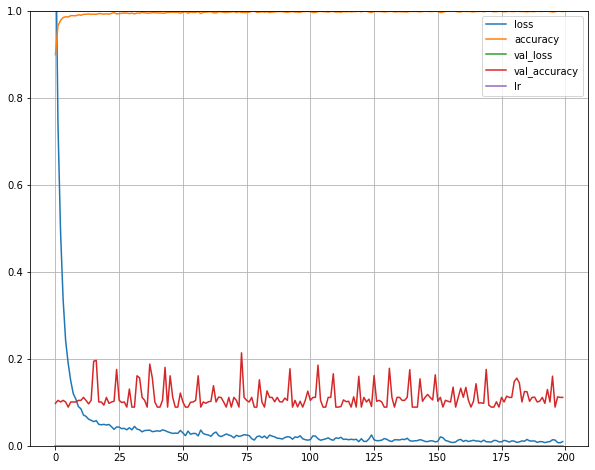

In [128]:
# Plot the train-val Loss and Accuracy
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [134]:
# Evaluate the Model with Test data set we have allocated 
eval = model.evaluate(x_test, y_test)

train_accuracy = round(history.history['accuracy'][-1], 5)
test_accuracy = round(eval[1], 5)
time = round(time_taken.total_seconds())

printDf = printDf.append( pd.Series([4, 200, time, train_accuracy, test_accuracy], index=printDf.columns), 
                ignore_index=True )
eval

263/263 [==============================] - 1s 2ms/step - loss: 597.7794 - accuracy: 0.1062


[597.7793579101562, 0.10619047284126282]

In [135]:
printDf

,Layers,Nodes,Time,Training Accuracy,Test Accuracy
0,2.0,100.0,113.0,0.99792,0.10667
1,2.0,200.0,155.0,0.99955,0.21917
2,4.0,100.0,213.0,0.99691,0.10464
3,4.0,200.0,244.0,0.99847,0.10619


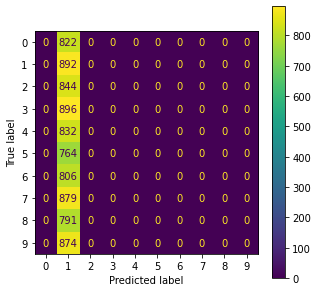

In [136]:
# The Multi-Class Confusion Matrix
y_test_pred = np.argmax(model.predict(x_test), axis=-1)
cm_mat = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_mat).plot()

In [137]:
# Kaggle Submission
test_data
pred = np.argmax(model.predict(test_data), axis=-1)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('sample_submission_NN_4_200.csv', index=False)
print("Submission successful")

   ImageId  Label
0        1      1
1        2      1
2        3      1
3        4      1
4        5      1
Submission successful


# Models Summary
  Neural Nets or Perceptrons are very powerful classifiers, they do work very well but at the same time they take Lot of Cpu/Gpu resources for fitting. I tried with 5 layers, 500, 300, 100 neuron funnel, but each run took a long time. In all the runs above as we can see the train and validation accuracies are not merging, with proper layers, neuron funnels (like 500, 300, 200, 80, 60, 10) we can get better results. Also due to Cpu constraints we are not running the fitting iteration multiple times, I tried with a simple model with multiple fitting iterations and the scores were better and there was convergence.
  We went for a 2x2 completely crossed Design, with {2,4} hidden layers, and {100, 200} Nodes in each layer. The results are printed above. Most of the plots here show wide gap between train and validation, which means model is overfitting the training data set.
  So with increased CPU and GPU resources, we can train the NNs with hyper-parameter tuning to give us better results.
  

